## House Prices: Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline

#### Sample output:

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Collecting test and train data :

In [3]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Visualising the missing data in training set:

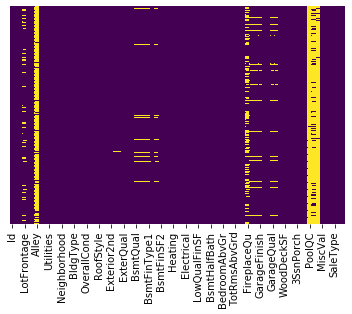

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis', cbar=False)

## Merging test and train data

*Temporarily for feature engineering and dealing with missing data**

In [7]:
new = pd.concat((test,train),ignore_index=True)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

C:\Users\Subham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
new['SalePrice'].isnull().value_counts()

False    1460
True     1459
Name: SalePrice, dtype: int64

Finding the index from where the training data is starting

In [9]:
test.info()  # Train split from 1459

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#### Removing columns from the combined dataset where missing value counts more than 60% 

In [10]:
# Sale price gets auto excluded for 0.5 value
for col in new.columns:
    if new[col].count()/new.shape[0] < 0.6 and col != 'SalePrice':
        new.drop([col],axis=1,inplace=True)
        print(col)

Alley
Fence
FireplaceQu
MiscFeature
PoolQC


#### Visualising the necessity of missing data filling

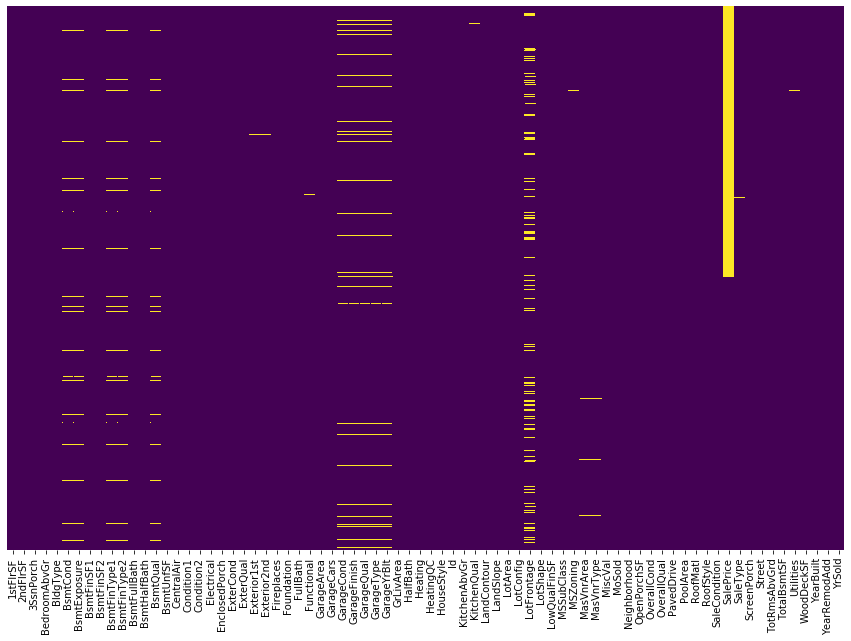

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(new.isnull(), yticklabels=False, cmap='viridis', cbar=False,xticklabels=True)

In [12]:
new.dtypes  # Checking the various datatypes present

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageArea       float64
GarageCars       float64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscVal            int64


In [13]:
new['YrSold'].dtypes is np.dtype('float64') or new['YrSold'].dtypes is np.dtype('int64')

True

### Filling the missing values:

For *float* type we've taken **mean** and for *object* type we've taken **mode**

In [14]:
for cols in new.columns:
    if new[cols].isnull().any() and cols != 'SalePrice': #checks if nan exhists
        
        print('{} -> {}'.format(cols,new[cols].dtype))  # pthon older version: f' not works
        
        if new[cols].dtype is np.dtype('float64'):
            new[cols] = new[cols].fillna(value=new[cols].mean())
            
        elif new[cols].dtype is np.dtype('O'):
            new[cols] = new[cols].fillna(value=new[cols].mode()[0])

BsmtCond -> object
BsmtExposure -> object
BsmtFinSF1 -> float64
BsmtFinSF2 -> float64
BsmtFinType1 -> object
BsmtFinType2 -> object
BsmtFullBath -> float64
BsmtHalfBath -> float64
BsmtQual -> object
BsmtUnfSF -> float64
Electrical -> object
Exterior1st -> object
Exterior2nd -> object
Functional -> object
GarageArea -> float64
GarageCars -> float64
GarageCond -> object
GarageFinish -> object
GarageQual -> object
GarageType -> object
GarageYrBlt -> float64
KitchenQual -> object
LotFrontage -> float64
MSZoning -> object
MasVnrArea -> float64
MasVnrType -> object
SaleType -> object
TotalBsmtSF -> float64
Utilities -> object


In [15]:
new.isnull().sum()  # There are no missing values

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fireplaces          0
Foundation          0
FullBath            0
Functional          0
GarageArea          0
GarageCars          0
                 ... 
LotConfig           0
LotFrontage         0
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            0
MasVnrArea          0
MasVnrType          0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

In [16]:
columns = new.columns
columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SalePric

### Adding Categorical Features

In [17]:
for col in columns:
    print(col)
    # Adding categorical features
    if new[col].dtype is np.dtype('O'):
        
        new =pd.get_dummies(new,columns=[col],drop_first=True)
        

1stFlrSF
2ndFlrSF
3SsnPorch
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
Id
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
RoofMatl
RoofStyle
SaleCondition
SalePrice
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


In [18]:
new.shape

(2919, 234)

In [19]:
## Tensorflow is giving error for space in column names
newcol = []
for col in new.columns:
    col = ''.join(col.split('&'))
    newcol.append(''.join(col.split()))

In [20]:
new.columns = newcol

### Un-merging to train and test set 

In [21]:
ftrain=new.loc[new.index>=1459].copy()
ftest=new.loc[new.index<1459].copy()

In [22]:
ftrain['SalePrice']

1459    208500.0
1460    181500.0
1461    223500.0
1462    140000.0
1463    250000.0
1464    143000.0
1465    307000.0
1466    200000.0
1467    129900.0
1468    118000.0
1469    129500.0
1470    345000.0
1471    144000.0
1472    279500.0
1473    157000.0
1474    132000.0
1475    149000.0
1476     90000.0
1477    159000.0
1478    139000.0
1479    325300.0
1480    139400.0
1481    230000.0
1482    129900.0
1483    154000.0
1484    256300.0
1485    134800.0
1486    306000.0
1487    207500.0
1488     68500.0
          ...   
2889    192140.0
2890    143750.0
2891     64500.0
2892    186500.0
2893    160000.0
2894    174000.0
2895    120500.0
2896    394617.0
2897    149700.0
2898    197000.0
2899    191000.0
2900    149300.0
2901    310000.0
2902    121000.0
2903    179600.0
2904    129000.0
2905    157900.0
2906    240000.0
2907    112000.0
2908     92000.0
2909    136000.0
2910    287090.0
2911    145000.0
2912     84500.0
2913    185000.0
2914    175000.0
2915    210000.0
2916    266500

In [154]:
new.iloc[1458]['SalePrice']

nan

In [24]:
ftest.drop(['SalePrice'],axis=1,inplace=True)

### Scaling the dataset

Here we're using **MinMaxScalar** on the train and testset by fitting the model in test set only

In [203]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
scaler = MinMaxScaler()

In [205]:
scaler.fit(ftrain.drop(['SalePrice','Id'], axis=1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [206]:
scaled_trainX = pd.DataFrame(data=scaler.transform(ftrain.drop(['SalePrice','Id'],axis=1))
                            ,columns=ftest.columns.drop(['Id']))
scaled_trainX.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,0.119780,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.212942,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.134465,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.143873,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,0.492754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.186095,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [207]:
scaled_trainX.shape

(1460, 232)

In [208]:
ftrain['SalePrice'].shape

(1460,)

In [209]:
scaled_test = pd.DataFrame(data=scaler.transform(ftest.drop(['Id'],axis=1)),columns=ftest.columns.drop(['Id']))
scaled_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,0.128958,0.000000,0.0,0.250,0.082920,0.097693,0.0,0.0,0.115582,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.228316,0.000000,0.0,0.375,0.163536,0.000000,0.0,0.0,0.173801,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.136301,0.339467,0.0,0.375,0.140149,0.000000,0.0,0.0,0.058647,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.135842,0.328329,0.0,0.375,0.106662,0.000000,0.0,0.0,0.138699,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.217072,0.000000,0.0,0.250,0.046598,0.000000,0.0,0.0,0.435360,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Making one validation set (30%) for testing our model

In [210]:
from sklearn.model_selection import train_test_split
X=scaled_trainX
y=ftrain['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=108)

## Testing & Selecting ML Models

### 01 : Using Linear Regression

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
lm = LinearRegression()

In [213]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
# Prediction
prediction = lm.predict(X_test)

##### Testing accuracy using **RMSE** 

In [215]:
from sklearn import metrics

In [216]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

27378.92958159793

### 02 : Using Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
logmodel = LogisticRegression()

In [219]:
logmodel.fit(X_train,y_train)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
prediction = logmodel.predict(X_test)

In [221]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

51413.0001582893

**Conclusion:** Linear regression is working better

### 03 : Using K-NN Regression

In [222]:
from sklearn.neighbors import KNeighborsRegressor

       **All possible values of neighbours**

In [223]:
rmse = []
for neighbours in range(1,100):
    
    knn = KNeighborsRegressor(n_neighbors=neighbours)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    rmse.append(metrics.mean_squared_error(y_test,prediction)**(1/2))

Text(0, 0.5, 'Error Rate')

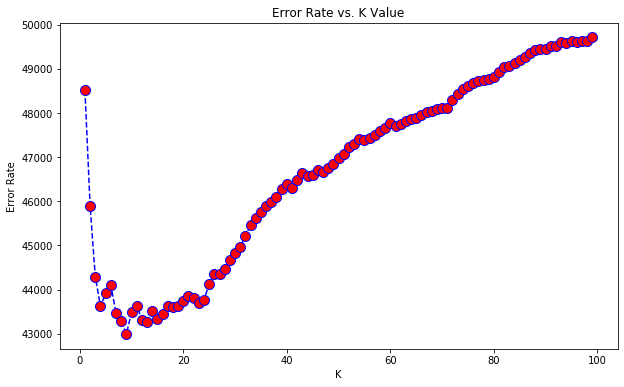

In [224]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),rmse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Looking at this plot the value of n=15 is appropiate

In [233]:
# n=15
knn = KNeighborsRegressor(n_neighbors=15)

In [234]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [235]:
prediction = knn.predict(X_test)

In [236]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

43341.29050296653

### 04 : Using Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dtree = DecisionTreeRegressor()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
prediction = dtree.predict(X_test)

In [55]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

42866.67279012789

### 05 : Using Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rfc = RandomForestRegressor()

In [58]:
rfc.fit(X_train,y_train)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
prediction = rfc.predict(X_test)

In [60]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

29738.927588837705

### 06 : Using AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
ab = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

In [63]:
ab.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [64]:
prediction = ab.predict(X_test)

In [65]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

35257.4828358666

### 07 : Using BaggingRegressor

In [66]:
from sklearn.ensemble import BaggingRegressor

In [67]:
br = BaggingRegressor()

In [68]:
br.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [69]:
prediction = br.predict(X_test)

In [70]:
metrics.mean_squared_error(y_test,prediction)**(1/2)

## Close enough to linear regressor

28028.457781940862

### 07 : Using GradientBoostingRegressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gb = GradientBoostingRegressor()

In [73]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
prediction = gb.predict(X_test)

In [75]:
metrics.mean_squared_error(y_test,prediction)**(1/2)
# Best so far

25424.153461633316

### 08 : Using Ridge Regression - Linear Model
It penalizes L2 norm

In [76]:
from sklearn.linear_model import Ridge

In [77]:
ridge = Ridge() # alpha=0.1 default

In [78]:
ridge.fit(X_train,y_train)
prediction = ridge.predict(X_test)
metrics.mean_squared_error(y_test,prediction)**(1/2)

## Not as good

29995.00875247804

##### Adjusting **Alpha** parameter -
Increasing Alpha forces coeffs to move towards zero, which decreases training set performance.

Decreasing Alpha reduces underfitting.

**alpha=10**

In [79]:
ridge = Ridge(alpha=10)

ridge.fit(X_train,y_train)
prediction = ridge.predict(X_test)
metrics.mean_squared_error(y_test,prediction)**(1/2)
## lil bit improvement

29144.027661803793

**alpha=1**

In [80]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)
prediction = ridge.predict(X_test)
metrics.mean_squared_error(y_test,prediction)**(1/2)

29995.00875247804

### 09 : Using Lasso

Automatic feature selection - Eliminates many columns

In [81]:
from sklearn.linear_model import Lasso

In [82]:
lasso = Lasso()

In [83]:
lasso.fit(X_train,y_train)
prediction = lasso.predict(X_test)
metrics.mean_squared_error(y_test,prediction)**(1/2)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10142374133.901062, tolerance: 674022315.7322047
  positive)


27406.88104796211

In [84]:
print(f'Training score: {lasso.score(X_train,y_train)}')
print(f'Test score: {lasso.score(X_test,y_test)}')

print(f'No. of feats: {np.sum(lasso.coef_!=0)}')
## No of feats used 226/233

Training score: 0.9359281417501445
Test score: 0.8666298953222715
No. of feats: 226


Adjsting alpha:

In [85]:
lasso = Lasso(alpha=0.01, max_iter=100000)

lasso.fit(X_train,y_train)
prediction = lasso.predict(X_test)
metrics.mean_squared_error(y_test,prediction)**(1/2)

C:\Users\Subham\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2996245853.689575, tolerance: 674022315.7322047
  positive)


27602.1451617799

In [86]:
print(f'Training score: {lasso.score(X_train,y_train)}')
print(f'Test score: {lasso.score(X_test,y_test)}')

print(f'No. of feats: {np.sum(lasso.coef_!=0)}')

Training score: 0.9359995821368624
Test score: 0.8647226978869151
No. of feats: 227


### 10 : TensorFlow Regression - DNN

In [87]:
# Checking dtypes of the fetures
X_train.dtypes.value_counts()

float64    233
dtype: int64

##### All dtypes belong to float

Model feature columns will be modified later by implementing keras and TF2.0


In [88]:
feat_col = []
for col in X_train.columns:
    feat_col.append(tf.feature_column.numeric_column(col))

#### Input Function:

In [98]:
ip_train = tf.estimator.inputs.pandas_input_fn(x=X_train.reset_index(drop=True),
                                               y=y_train.reset_index(drop=True),
                                               batch_size=18,num_epochs=1000,shuffle=True)

# Index reset due to mismatch error

#### Creating Model:

In [99]:
model = tf.estimator.DNNRegressor(hidden_units=[9,18,108,51,18], feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Subham\\AppData\\Local\\Temp\\tmpu6fhla04', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002663B04A2B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [100]:
model.train(input_fn=ip_train,steps=99999)

# pd.getdummies join should be changed - 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Subham\AppData\Local\Temp\tmpu6fhla04\model.ckpt.
INFO:tensorflow:loss = 879520500000.0, step = 1
INFO:tensorflow:global_step/sec: 71.965
INFO:tensorflow:loss = 33328126000.0, step = 101 (1.374 sec)
INFO:tensorflow:global_step/sec: 72.8518
INFO:tensorflow:loss = 12006653000.0, step = 201 (1.373 sec)
INFO:tensorflow:global_step/sec: 75.8043
INFO:tensorflow:loss = 13749663000.0, step = 301 (1.319 sec)
INFO:tensorflow:global_step/sec: 76.6872
INFO:tensorflow:loss = 7292382700.0, step = 401 (1.304 sec)
INFO:tensorflow:global_step/sec: 78.5857
INFO:tensorflow:loss = 23694524000.0, step = 501 (1.288 sec)
INFO:tensorflow:glo

INFO:tensorflow:loss = 31236290000.0, step = 7401 (1.373 sec)
INFO:tensorflow:global_step/sec: 71.236
INFO:tensorflow:loss = 5324547600.0, step = 7501 (1.404 sec)
INFO:tensorflow:global_step/sec: 69.6837
INFO:tensorflow:loss = 5464787000.0, step = 7601 (1.435 sec)
INFO:tensorflow:global_step/sec: 72.845
INFO:tensorflow:loss = 8642010000.0, step = 7701 (1.373 sec)
INFO:tensorflow:global_step/sec: 74.0273
INFO:tensorflow:loss = 4361898500.0, step = 7801 (1.351 sec)
INFO:tensorflow:global_step/sec: 75.4097
INFO:tensorflow:loss = 55034905000.0, step = 7901 (1.326 sec)
INFO:tensorflow:global_step/sec: 72.3417
INFO:tensorflow:loss = 2600316400.0, step = 8001 (1.382 sec)
INFO:tensorflow:global_step/sec: 76.5852
INFO:tensorflow:loss = 6702768000.0, step = 8101 (1.306 sec)
INFO:tensorflow:global_step/sec: 75.7969
INFO:tensorflow:loss = 4650031600.0, step = 8201 (1.319 sec)
INFO:tensorflow:global_step/sec: 77.6532
INFO:tensorflow:loss = 3053714000.0, step = 8301 (1.303 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 2893922800.0, step = 15401 (1.465 sec)
INFO:tensorflow:global_step/sec: 74.5486
INFO:tensorflow:loss = 9303221000.0, step = 15501 (1.335 sec)
INFO:tensorflow:global_step/sec: 74.8879
INFO:tensorflow:loss = 4807003600.0, step = 15601 (1.335 sec)
INFO:tensorflow:global_step/sec: 72.8216
INFO:tensorflow:loss = 12746865000.0, step = 15701 (1.373 sec)
INFO:tensorflow:global_step/sec: 71.2282
INFO:tensorflow:loss = 3162607400.0, step = 15801 (1.404 sec)
INFO:tensorflow:global_step/sec: 74.8844
INFO:tensorflow:loss = 4363899000.0, step = 15901 (1.351 sec)
INFO:tensorflow:global_step/sec: 72.8655
INFO:tensorflow:loss = 2016765400.0, step = 16001 (1.357 sec)
INFO:tensorflow:global_step/sec: 74.0342
INFO:tensorflow:loss = 1796107300.0, step = 16101 (1.351 sec)
INFO:tensorflow:global_step/sec: 73.8198
INFO:tensorflow:loss = 2486118100.0, step = 16201 (1.355 sec)
INFO:tensorflow:global_step/sec: 71.2304
INFO:tensorflow:loss = 7185993700.0, step = 16301 (1.404 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 75.8057
INFO:tensorflow:loss = 2032460400.0, step = 23401 (1.304 sec)
INFO:tensorflow:global_step/sec: 72.0302
INFO:tensorflow:loss = 3892649000.0, step = 23501 (1.388 sec)
INFO:tensorflow:global_step/sec: 72.0282
INFO:tensorflow:loss = 2438133200.0, step = 23601 (1.388 sec)
INFO:tensorflow:global_step/sec: 74.8883
INFO:tensorflow:loss = 6286671000.0, step = 23701 (1.335 sec)
INFO:tensorflow:global_step/sec: 71.9105
INFO:tensorflow:loss = 6147640000.0, step = 23801 (1.391 sec)
INFO:tensorflow:global_step/sec: 75.7859
INFO:tensorflow:loss = 5832983000.0, step = 23901 (1.320 sec)
INFO:tensorflow:global_step/sec: 70.2849
INFO:tensorflow:loss = 2469997800.0, step = 24001 (1.423 sec)
INFO:tensorflow:global_step/sec: 73.6913
INFO:tensorflow:loss = 1727554300.0, step = 24101 (1.357 sec)
INFO:tensorflow:global_step/sec: 75.7903
INFO:tensorflow:loss = 4005197600.0, step = 24201 (1.319 sec)
INFO:tensorflow:global_step/sec: 76.6793
INFO:tensorflow:loss = 210055630

INFO:tensorflow:global_step/sec: 72.3698
INFO:tensorflow:loss = 3093825800.0, step = 31401 (1.382 sec)
INFO:tensorflow:global_step/sec: 74.4234
INFO:tensorflow:loss = 6730300000.0, step = 31501 (1.344 sec)
INFO:tensorflow:global_step/sec: 74.832
INFO:tensorflow:loss = 3057695700.0, step = 31601 (1.336 sec)
INFO:tensorflow:global_step/sec: 76.6952
INFO:tensorflow:loss = 3443565300.0, step = 31701 (1.304 sec)
INFO:tensorflow:global_step/sec: 71.2008
INFO:tensorflow:loss = 6697696000.0, step = 31801 (1.404 sec)
INFO:tensorflow:global_step/sec: 71.2278
INFO:tensorflow:loss = 2484295000.0, step = 31901 (1.404 sec)
INFO:tensorflow:global_step/sec: 73.691
INFO:tensorflow:loss = 8484989000.0, step = 32001 (1.357 sec)
INFO:tensorflow:global_step/sec: 75.7719
INFO:tensorflow:loss = 9470104000.0, step = 32101 (1.320 sec)
INFO:tensorflow:global_step/sec: 76.6829
INFO:tensorflow:loss = 7998074000.0, step = 32201 (1.304 sec)
INFO:tensorflow:global_step/sec: 72.3458
INFO:tensorflow:loss = 18538062000

INFO:tensorflow:global_step/sec: 75.775
INFO:tensorflow:loss = 3727270400.0, step = 39401 (1.320 sec)
INFO:tensorflow:global_step/sec: 75.4444
INFO:tensorflow:loss = 5125781000.0, step = 39501 (1.325 sec)
INFO:tensorflow:global_step/sec: 73.1749
INFO:tensorflow:loss = 3796945400.0, step = 39601 (1.367 sec)
INFO:tensorflow:global_step/sec: 76.7245
INFO:tensorflow:loss = 8450553000.0, step = 39701 (1.303 sec)
INFO:tensorflow:global_step/sec: 76.6541
INFO:tensorflow:loss = 4478076400.0, step = 39801 (1.305 sec)
INFO:tensorflow:global_step/sec: 77.6038
INFO:tensorflow:loss = 5329550000.0, step = 39901 (1.289 sec)
INFO:tensorflow:global_step/sec: 73.6612
INFO:tensorflow:loss = 3989525000.0, step = 40001 (1.358 sec)
INFO:tensorflow:global_step/sec: 76.6756
INFO:tensorflow:loss = 11522767000.0, step = 40101 (1.304 sec)
INFO:tensorflow:global_step/sec: 75.7705
INFO:tensorflow:loss = 2968909600.0, step = 40201 (1.320 sec)
INFO:tensorflow:global_step/sec: 74.0409
INFO:tensorflow:loss = 393774980

INFO:tensorflow:global_step/sec: 77.6127
INFO:tensorflow:loss = 2856717300.0, step = 47301 (1.288 sec)
INFO:tensorflow:global_step/sec: 73.5743
INFO:tensorflow:loss = 1991150100.0, step = 47401 (1.359 sec)
INFO:tensorflow:global_step/sec: 74.9274
INFO:tensorflow:loss = 6061218000.0, step = 47501 (1.335 sec)
INFO:tensorflow:global_step/sec: 76.6866
INFO:tensorflow:loss = 2540916200.0, step = 47601 (1.304 sec)
INFO:tensorflow:global_step/sec: 75.7707
INFO:tensorflow:loss = 1654264800.0, step = 47701 (1.320 sec)
INFO:tensorflow:global_step/sec: 72.835
INFO:tensorflow:loss = 11297613000.0, step = 47801 (1.373 sec)
INFO:tensorflow:global_step/sec: 77.6256
INFO:tensorflow:loss = 8714634000.0, step = 47901 (1.288 sec)
INFO:tensorflow:global_step/sec: 75.7667
INFO:tensorflow:loss = 1357034900.0, step = 48001 (1.320 sec)
INFO:tensorflow:global_step/sec: 75.7957
INFO:tensorflow:loss = 3864833500.0, step = 48101 (1.319 sec)
INFO:tensorflow:global_step/sec: 76.6826
INFO:tensorflow:loss = 276938500

INFO:tensorflow:global_step/sec: 72.746
INFO:tensorflow:loss = 5805468700.0, step = 55301 (1.375 sec)
INFO:tensorflow:global_step/sec: 69.9377
INFO:tensorflow:loss = 3988011000.0, step = 55401 (1.430 sec)
INFO:tensorflow:global_step/sec: 75.5555
INFO:tensorflow:loss = 3109886000.0, step = 55501 (1.324 sec)
INFO:tensorflow:global_step/sec: 74.0398
INFO:tensorflow:loss = 3640796200.0, step = 55601 (1.351 sec)
INFO:tensorflow:global_step/sec: 74.8863
INFO:tensorflow:loss = 5488793600.0, step = 55701 (1.335 sec)
INFO:tensorflow:global_step/sec: 75.4223
INFO:tensorflow:loss = 3760484000.0, step = 55801 (1.326 sec)
INFO:tensorflow:global_step/sec: 70.4519
INFO:tensorflow:loss = 5116625400.0, step = 55901 (1.435 sec)
INFO:tensorflow:global_step/sec: 74.0296
INFO:tensorflow:loss = 7769937400.0, step = 56001 (1.335 sec)
INFO:tensorflow:global_step/sec: 74.549
INFO:tensorflow:loss = 7262105000.0, step = 56101 (1.341 sec)
INFO:tensorflow:global_step/sec: 74.0415
INFO:tensorflow:loss = 3361257000.

#### Evaluating Model

In [101]:
model.evaluate(ip_train,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-29T09:24:33Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Subham\AppData\Local\Temp\tmpu6fhla04\model.ckpt-56778
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-29-09:24:48
INFO:tensorflow:Saving dict for global step 56778: average_loss = 254541680.0, global_step = 56778, label/mean = 1

{'average_loss': 254541680.0,
 'label/mean': 180385.89,
 'loss': 4581750300.0,
 'prediction/mean': 178803.84,
 'global_step': 56778}

In [103]:
ip_test = tf.estimator.inputs.pandas_input_fn(x=X_test.reset_index(drop=True),
                                               y=y_test.reset_index(drop=True),
                                               batch_size=18,num_epochs=1000,shuffle=False)

In [104]:
model.evaluate(ip_test,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-29T09:26:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Subham\AppData\Local\Temp\tmpu6fhla04\model.ckpt-56778
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-29-09:26:51
INFO:tensorflow:Saving dict for global step 56778: average_loss = 1258166800.0, global_step = 56778, label/mean = 182097.97, loss = 22647001000.0, prediction/mean = 183666.8
INFO:tensorflow:Saving 'che

{'average_loss': 1258166800.0,
 'label/mean': 182097.97,
 'loss': 22647001000.0,
 'prediction/mean': 183666.8,
 'global_step': 56778}

In [105]:
ip_eval = tf.estimator.inputs.pandas_input_fn(x=X_test.reset_index(drop=True),
                                              batch_size=10,shuffle=False)

In [106]:
pred = list(model.predict(input_fn=ip_eval)) # Generator produced

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Subham\AppData\Local\Temp\tmpu6fhla04\model.ckpt-56778
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [108]:
final_preds = []
for val in pred:
    final_preds.append(val['predictions'])
    
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,final_preds)**0.5

# Not performed that well.

35431.45032541397

### 11 : Using XGBoost

In [112]:
from xgboost import XGBRegressor

In [113]:
xgb = XGBRegressor()

In [120]:
xgb.fit(X_train,y_train)

C:\Users\Subham\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:18:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [121]:
prediction = xgb.predict(X_test)

In [122]:
mean_squared_error(y_test,prediction)**0.5

27305.79075164007

#### Conclusion of Algorithms:

Based on the RMSE result on the validation set for above 11 models, **GradientBoostingRegressor** works best.

So, we'll train the model and predict the values for the actual test case.

## Predicting values for the test case.

 **Training using GradientBoostingRegressor.**

In [175]:
X=scaled_trainX
y=ftrain['SalePrice']

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

In [177]:
gb = GradientBoostingRegressor()

In [178]:
gb.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**Predicting the test set**

###### Sample Submission

In [179]:
pd.read_csv('sample_submission.csv').head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [180]:
prediction=gb.predict(scaled_test)
len(prediction)

1459

In [181]:
df_sp=pd.DataFrame(prediction,columns=['SalePrice'])

In [182]:
df_id=pd.DataFrame(ftest['Id'],columns=['Id'])

In [183]:
final = pd.concat((df_id,df_sp),axis=1)

In [184]:
final.count()

Id           1459
SalePrice    1459
dtype: int64

In [186]:
final

,Id,SalePrice
0,1461,119529.019292
1,1462,163268.636674
2,1463,174886.985760
3,1464,181234.822863
4,1465,197175.557594
5,1466,177866.365477
6,1467,163126.150691
7,1468,164536.399370
8,1469,195815.265951
9,1470,124748.460921


In [188]:
final.to_csv('submit.csv',index=False)